# E-commerce
### Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на вопросы.
#### Задача 1
#### Сколько у нас пользователей, которые совершили покупку только один раз?

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import requests 
from urllib.parse import urlencode 
from operator import attrgetter
from datetime import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Создаем функцию для загрузки данных с яндекс-диска
def yandex_read_csv (public_key):
    # используем api
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    # получаем url
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    # загружаем файл в df
    download_response = requests.get(download_url)
    df = pd.read_csv(download_url)
    return df

In [3]:
# Считываем данные
olist_customers_dataset = yandex_read_csv('https://disk.yandex.ru/d/fEbfN-0c92X_Ig')
olist_orders_dataset = yandex_read_csv ('https://disk.yandex.ru/d/Y-ygUd4Syrx_ug')
olist_order_items_dataset = yandex_read_csv ('https://disk.yandex.ru/d/dfvRB9ejHrArzw')

Проведем предварительную проверку данных

In [4]:
# Посмотрим на таблицу с уникальными идентификаторами пользователей
olist_customers_dataset.head(2) 

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [5]:
# Размер таблицы
print('Размер таблицы:', olist_customers_dataset.shape, '\n')
# Типы данных
print ('Типы данных:\n', olist_customers_dataset.dtypes, '\n')
# Наличие пропущенных значений
print ('Пропущенные значения:\n', olist_customers_dataset.isna().sum())

Размер таблицы: (99441, 5) 

Типы данных:
 customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object 

Пропущенные значения:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [6]:
# Посмотрим на таблицу заказов
olist_orders_dataset.head(2) 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [7]:
# Приведем столбцы к нужному типу данных
olist_orders_dataset['order_purchase_timestamp'] = pd.to_datetime(olist_orders_dataset.order_purchase_timestamp) 
olist_orders_dataset['order_approved_at'] = pd.to_datetime(olist_orders_dataset.order_approved_at)
olist_orders_dataset['order_delivered_carrier_date'] = pd.to_datetime(olist_orders_dataset.order_delivered_carrier_date)
olist_orders_dataset['order_delivered_customer_date'] = pd.to_datetime(olist_orders_dataset.order_delivered_customer_date)
olist_orders_dataset['order_estimated_delivery_date'] = pd.to_datetime(olist_orders_dataset.order_estimated_delivery_date)

In [8]:
# Размер таблицы
print('Размер таблицы:', olist_orders_dataset.shape, '\n')
# Типы данных
print ('Типы данных:\n', olist_orders_dataset.dtypes, '\n')
# Наличие пропущенных значений
print ('Пропущенные значения:\n', olist_orders_dataset.isna().sum())

Размер таблицы: (99441, 8) 

Типы данных:
 order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object 

Пропущенные значения:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [9]:
# Посмотрим на таблицу с товарными позициями, входящими в заказы
olist_order_items_dataset.head(2) 

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [10]:
# Приведем столбцы к нужному типу данных
olist_order_items_dataset['shipping_limit_date'] = pd.to_datetime(olist_order_items_dataset.shipping_limit_date)

In [11]:
# Размер таблицы
print('Размер таблицы:', olist_order_items_dataset.shape, '\n')
# Типы данных
print ('Типы данных:\n', olist_order_items_dataset.dtypes, '\n')
# Наличие пропущенных значений
print ('Пропущенные значения:\n', olist_order_items_dataset.isna().sum())

Размер таблицы: (112650, 7) 

Типы данных:
 order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object 

Пропущенные значения:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [12]:
# Посмотрим на распредление заказов в зависимости от статуса
olist_orders_dataset \
    .groupby("order_status", as_index = False) \
    .agg({"customer_id": "count"})

,order_status,customer_id
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


In [13]:
# Посмотрим, в каких временных рамках подтверждалась оплата заказа
print(olist_orders_dataset.order_approved_at.min())
print(olist_orders_dataset.order_approved_at.max())

2016-09-15 12:16:38
2018-09-03 17:40:06


In [14]:
# Посмотрим, сколько товаров в каждом заказе
olist_order_items_dataset \
    .groupby("order_id", as_index = False) \
    .agg({"order_item_id": "count"}) \
    .sort_values("order_item_id", ascending=False)

,order_id,order_item_id
50137,8272b63d03f5f79c56e9e4120aec44ef,21
10459,1b15974a0141d54e36626dca3fdc731a,20
65715,ab14fdcfbe524636d65ee38360e22ce8,20
60941,9ef13efd6949e4573a18964dd1bbe7f5,15
25583,428a2f660dc84138d969ccd69a0ab6d5,15
...,...,...
34640,5a0911d70c1f85d3bed0df1bf693a6dd,1
34639,5a082b558a3798d3e36d93bfa8ca1eae,1
34637,5a07264682e0b8fbb3f166edbbffc6e8,1
34636,5a071192a28951b76774e5a760c8c9b7,1


Приступим к решению задачи 1.

В качестве покупки будем рассматривать статусы:

- processing — в процессе сборки заказа
- shipped — отгружен со склада
- delivered — доставлен пользователю

Заказы с таким статусом оплачены и не отменены, а значит произошел факт покупки

Почему другие статусы нам не подходят?

- created(создан) не будет рассматриваться в качестве покупки, так как заказ создан, но еще не подтвержден и не оплачен, а это значит, что факта покупки нет, заказ могут отменить на стадии оформления, это просто заявка
- approved(подтверждён) - здесь заказ уже подтвердили, то есть продавец подтвердил, что заказ он получил, но так же факта оплаты нет, а это не покупка
- invoiced(выставлен счёт) - продавец выставил счет, но он еще не оплачен
- unavailable(недоступен) и canceled(отменён) - данные статусы говорят о неудачной сделке, а не о покупке

In [15]:
#так как информация о пользователях и заказах в разных df, необходимо их объеденить по общему полю
orders_сustomers = olist_orders_dataset.merge(olist_customers_dataset, how='left', on='customer_id') 

In [16]:
orders_сustomers \
    .query('order_status == ["processing", "shipped", "delivered"]') \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'count_order'}) \
    .query('count_order == 1') \
    .customer_unique_id.count()

91814

Ответ: 91814 пользователей, которые совершили покупку только один раз

#### Задача 2
#### Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

На этапе предварительного исследования было выявлено, что в таблице olist_orders_dataset присутствуют пустые значения.

Если в столбце order_delivered_customer_date значение пустое - доставки не было.

In [17]:
# Посмотрим, какие статусы мы имеем в таблице
olist_orders_dataset \
    .fillna(0) \
    .query('order_delivered_customer_date == 0') \
    .groupby('order_status',as_index=False) \
    .agg({'order_purchase_timestamp':'count'}) \
    .rename(columns={'order_purchase_timestamp':'count'})

,order_status,count
0,approved,2
1,canceled,619
2,created,5
3,delivered,8
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


In [18]:
# Оставим только заказы, которые не доставлены
undelivered = olist_orders_dataset \
    .fillna(0) \
    .query('order_delivered_customer_date == 0 and order_status != "delivered"')

In [19]:
# Приведем столбцы к месяцу
undelivered['order_purchase_timestamp'] = pd.to_datetime(undelivered.order_purchase_timestamp)
undelivered['order_purchase_timestamp'] = undelivered.order_purchase_timestamp.dt.strftime('%Y-%m')

In [20]:
# Ответим на вопрос задачи
reasons = undelivered \
    .groupby(['order_status','order_purchase_timestamp'],as_index=False) \
    .agg({'order_id':'count'})\
    .groupby('order_status',as_index=False) \
    .agg({'order_id':'mean'}) \
    .round()\
    .sort_values(by='order_id',ascending=False) 

reasons

,order_status,order_id
5,shipped,48.0
6,unavailable,29.0
1,canceled,26.0
4,processing,16.0
3,invoiced,15.0
2,created,2.0
0,approved,1.0


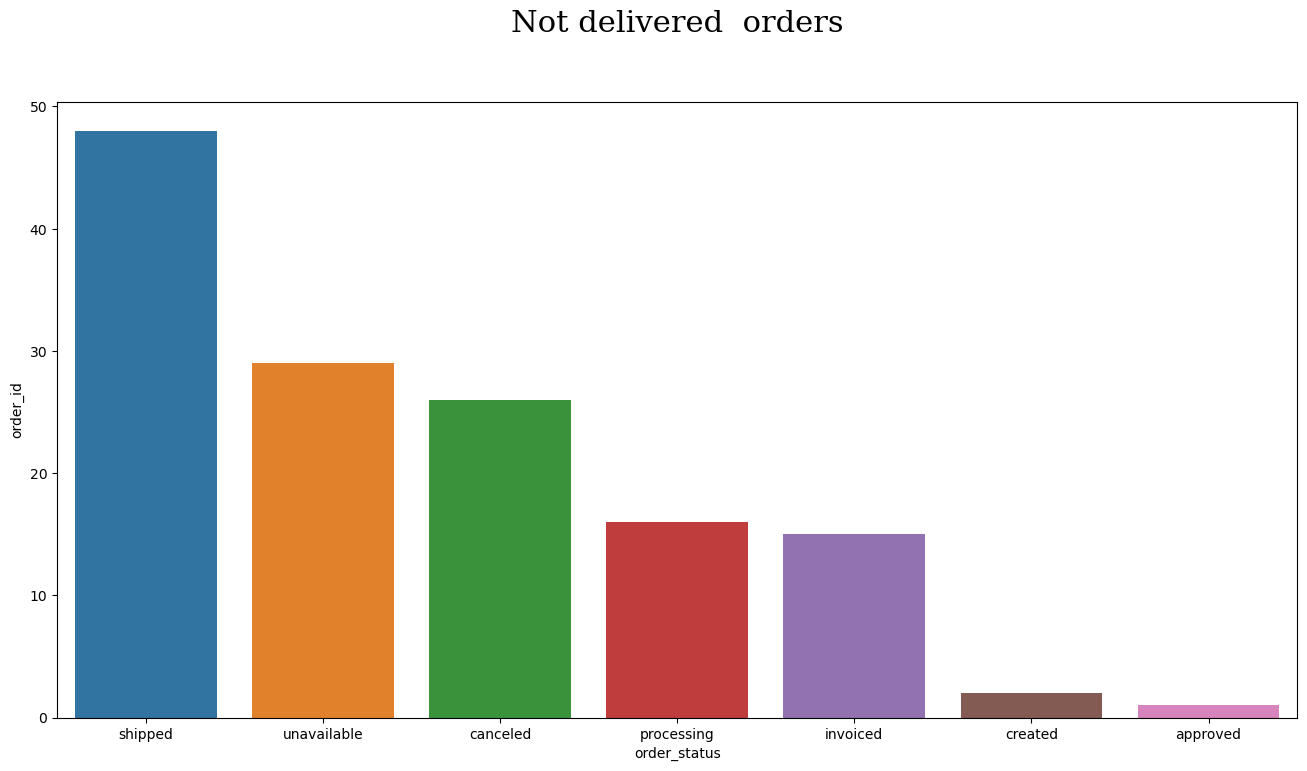

In [21]:
# Визуализируем результат
plt.figure(figsize=(16, 8))

sns.barplot(x='order_status', y='order_id', data=reasons)

plt.title(label = 'Not delivered  orders',
          color = 'black',
          fontsize = 22,
          x = 0.5,
          y = 1.1,
          family = 'serif')

plt.show()

#### Задача 3
#### По каждому товару определить, в какой день недели товар чаще всего покупается.

In [22]:
# Объединим таблицы с информацией о заказах и о товарных позициях
olist_orders_items = olist_orders_dataset \
    .merge(olist_order_items_dataset, how='left', on='order_id') 

In [23]:
# Оставим только нужные статусы
olist_orders_items = olist_orders_items.query('order_status == ["processing", "shipped", "delivered"]')

In [24]:
# Изменим тип столбца
olist_orders_items['order_purchase_timestamp'] = pd.to_datetime(olist_orders_items.order_purchase_timestamp)

In [25]:
# Создадим столбец с названием дня недели
olist_orders_items['day_of_week'] = olist_orders_items.order_purchase_timestamp.dt.day_name()

In [26]:
# Ответим на вопрос задачи
olist_orders_items \
    .groupby(['product_id','day_of_week',],as_index=False)\
    .agg({'order_id':'count'}) \
    .sort_values(by='order_id',ascending=False) \
    .drop_duplicates(subset='product_id')

,product_id,day_of_week,order_id
15766,422879e10f46682990de24d770e7f83d,Wednesday,93
36178,99a4788cb24856965c36a24e339b6058,Monday,92
40679,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
19944,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
13422,389d119b48cf3043d311335e499d9c6b,Thursday,67
...,...,...,...
23811,6435be64ad92f52631170f9a92718a99,Sunday,1
23813,64367bed3ed96fd9381676fbe33b6443,Sunday,1
23814,643a4049ae3e6df63858575f28cd7b21,Friday,1
23816,643a66b1dc5dad3de6cb5a41549e72f1,Sunday,1


#### Задача 4
#### Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
#### Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [27]:
# Объединим таблицы
merge_orders_items_customers = olist_orders_items.merge(olist_customers_dataset, how='left', on='customer_id')

In [28]:
# Приведем данные столбца order_purchase_timestamp к месяцу
merge_orders_items_customers['order_purchase_timestamp'] = pd.to_datetime(merge_orders_items_customers.order_purchase_timestamp) 
merge_orders_items_customers['order_purchase_timestamp'] = merge_orders_items_customers.order_purchase_timestamp.dt.strftime('%Y-%m')

In [29]:
# Сделаем таблицу, в которой посчитаем посчитаем число покупок в месяц по каждому пользователю
result_table = merge_orders_items_customers.query('order_status == ["processing", "shipped", "delivered"]')\
    .groupby(['customer_unique_id','order_purchase_timestamp'],as_index=False).agg({'order_status':'count'})

In [30]:
# Сделаем таблицу с количеством дней в каждом месяце
result_table['days'] = pd.to_datetime(result_table.order_purchase_timestamp) 
result_table.days = result_table.days.dt.days_in_month

In [31]:
# Посчитаем, сколько недель в каждом месяце по полученным дням
result_table['weeks'] = result_table.days / 7

In [32]:
# Посчитаем количество покупок в неделю по каждому пользователю
result_table['metric'] = result_table.order_status/result_table.weeks

In [33]:
# В результате получаем следующую таблицу
result_table.head()

,customer_unique_id,order_purchase_timestamp,order_status,days,weeks,metric
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,31,4.428571,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,31,4.428571,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,1,31,4.428571,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,31,4.428571,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,30,4.285714,0.233333


#### Задача 5
#### Используя pandas, проведи когортный анализ пользователей.
#### В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

In [34]:
# Объеденим таблицу с пользователями и заказами
for_kogort  = olist_customers_dataset.merge(olist_orders_dataset, how = 'left', on = 'customer_id')

In [35]:
# Проверим наличие пустых значений
for_kogort.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [36]:
# Удалим строки с пустым значением в столбце order_approved_at
for_kogort_new = for_kogort.dropna(axis='index', how='any', subset=['order_approved_at'])
# Проверим результат
for_kogort_new.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1637
order_delivered_customer_date    2819
order_estimated_delivery_date       0
dtype: int64

In [37]:
# Добавим столбец, в котором определим дату первой покупки
for_kogort_new['first_purchase'] = for_kogort_new.groupby('customer_unique_id')['order_approved_at'].transform('min')

C:\Users\astah\AppData\Local\Temp\ipykernel_10536\4272875144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_kogort_new['first_purchase'] = for_kogort_new.groupby('customer_unique_id')['order_approved_at'].transform('min')


In [38]:
# Приведем даты к месяцам
for_kogort_new.order_purchase_timestamp = for_kogort_new.order_purchase_timestamp.dt.strftime('%Y-%m')
for_kogort_new.order_approved_at = for_kogort_new.order_approved_at.dt.strftime('%Y-%m')
for_kogort_new.first_purchase = for_kogort_new['first_purchase'].dt.strftime('%Y-%m')
# Посмотрим на результат
for_kogort_new.head()

C:\Users\astah\AppData\Local\Temp\ipykernel_10536\4109080856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_kogort_new.order_purchase_timestamp = for_kogort_new.order_purchase_timestamp.dt.strftime('%Y-%m')
C:\Users\astah\AppData\Local\Temp\ipykernel_10536\4109080856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_kogort_new.order_approved_at = for_kogort_new.order_approved_at.dt.strftime('%Y-%m')
C:\Users\astah\AppData\Local\Temp\ipykernel_10536\4109080856.py:4: SettingWithCopyWarning: 
A 

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,first_purchase
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05,2017-05,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01,2018-01,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05,2018-05,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03,2018-03,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07,2018-07,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07


Найдем число уникальных покупателей в период с января по декабрь.

Для этого отберем только те строки, в которых статус заказа говорит о покупке, выберем строки, где первая покупка была сделана в промежуток с января по декабрь, сгруппируем по датам покупки и посчитаем число уникальных покупателей.

In [39]:
for_kogort_table = for_kogort_new.query('order_status == ["processing", "shipped", "delivered"]')\
    .query("'2017-01' <= first_purchase <= '2017-12'")\
    .groupby(['first_purchase', 'order_approved_at'],as_index=False).agg({'customer_unique_id': 'nunique'})

In [40]:
# Приведем к номеру месяца
for_kogort_table.first_purchase = pd.to_datetime(for_kogort_table.first_purchase).dt.to_period("m")
for_kogort_table.order_approved_at = pd.to_datetime(for_kogort_table.order_approved_at).dt.to_period("m")

In [41]:
# Посчитаем число месяцев с первой покупки до последующего подтвержения заказа
for_kogort_table['diff'] = (for_kogort_table.order_approved_at - for_kogort_table.first_purchase).apply(attrgetter("n"))
for_kogort_table_finish = for_kogort_table.pivot(index='first_purchase', columns = 'diff', values = 'customer_unique_id')

In [42]:
# Рассчитаем retention и визуализируем данные
retention = for_kogort_table_finish.div(for_kogort_table_finish.iloc[:,0], axis = 0)
final_table = (retention
            .style
            .set_caption('Retention by cohort')  # добавляем подпись
            .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту

final_table

diff,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
first_purchase,,,,,,,,,,,,,,,,,,,
2017-01,100.00%,0.57%,0.28%,0.14%,0.43%,0.14%,0.43%,0.14%,0.14%,,0.28%,0.28%,0.71%,0.43%,0.14%,0.14%,0.28%,0.43%,0.14%
2017-02,100.00%,0.24%,0.24%,0.18%,0.42%,0.12%,0.24%,0.18%,0.12%,0.24%,0.12%,0.30%,0.18%,0.18%,0.12%,0.06%,0.06%,0.24%,
2017-03,100.00%,0.50%,0.35%,0.35%,0.35%,0.16%,0.16%,0.31%,0.31%,0.12%,0.35%,0.12%,0.23%,0.12%,0.16%,0.23%,0.08%,0.16%,
2017-04,100.00%,0.61%,0.22%,0.17%,0.31%,0.26%,0.35%,0.26%,0.35%,0.17%,0.22%,0.09%,0.09%,0.04%,0.09%,0.09%,0.22%,,
2017-05,100.00%,0.54%,0.51%,0.40%,0.31%,0.34%,0.43%,0.17%,0.26%,0.26%,0.28%,0.34%,0.20%,0.06%,0.20%,0.26%,,,
2017-06,100.00%,0.48%,0.35%,0.39%,0.26%,0.32%,0.39%,0.23%,0.13%,0.23%,0.32%,0.35%,0.16%,0.13%,0.19%,,,,
2017-07,100.00%,0.53%,0.35%,0.21%,0.35%,0.19%,0.32%,0.11%,0.19%,0.24%,0.24%,0.29%,0.13%,0.27%,,,,,
2017-08,100.00%,0.68%,0.36%,0.27%,0.39%,0.53%,0.27%,0.27%,0.12%,0.17%,0.24%,0.17%,0.12%,,,,,,
2017-09,100.00%,0.66%,0.49%,0.34%,0.42%,0.27%,0.22%,0.22%,0.32%,0.17%,0.27%,0.07%,,,,,,,


In [43]:
# Найдем когорту с самым высоким retention на 3й месяц в период с января по декабрь
retention[2].idxmax()

Period('2017-05', 'M')

#### Задача 6
#### Часто для качественного анализа аудитории использую подходы, основанные на сегментации.
#### Используя python,построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики:
- R - время от последней покупки пользователя до текущей даты,
- F - суммарное количество покупок у пользователя за всё время,
- M - сумма покупок за всё время.
#### Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.

In [44]:
# Объеденим все три таблицы и удалим пустые значения
full_table = olist_orders_items.merge(olist_customers_dataset, how = 'left', on = 'customer_id').dropna() 

In [45]:
# В качестве текущей примем дату самой последней в столбце order_approved_at, увеличенную на 1 день, будто анализируем на следующий день после сбора данных
yesterday = full_table.order_approved_at.max()
today = yesterday + timedelta(days=1)

In [46]:
# Подготовим данные для FRM 
for_rfm = full_table \
    .groupby('customer_unique_id',as_index=False)\
    .agg({'order_approved_at': lambda x: (today - x.max()).days,\
          'product_id': lambda x: len(x),\
          'price': lambda x: x.sum()})\
    .rename(columns={'order_approved_at': 'R', 'product_id': 'F', 'price': 'M'})

Когда имеются значения для RFM, нужно выделить диапазоны

Каждый квантиль будет содержать 20%

Разбиваем на диапазон: до 20%, 20-40%, 40-60%, 60-80% и выше 80 %

In [47]:
# Посмотрим на результат 
for_rfm.head()

,customer_unique_id,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00


In [48]:
quantiles = for_rfm.quantile(q=[.2, .4, .6, .8])
quantiles

C:\Users\astah\AppData\Local\Temp\ipykernel_10536\2120000048.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = for_rfm.quantile(q=[.2, .4, .6, .8])


,R,F,M
0.2,92.0,1.0,39.9
0.4,177.0,1.0,69.9
0.6,268.0,1.0,109.9
0.8,382.0,1.0,179.9


In [49]:
# Выделим сегменты покупателей с помощью функции
def RClass(value,parameter,quantiles_table):
    if value <= quantiles_table[parameter][0.20]:
        return 1
    elif value <= quantiles_table[parameter][0.40]:
        return 2
    elif value <= quantiles_table[parameter][0.60]:
        return 3
    elif value <= quantiles_table[parameter][0.80]:
        return 4
    else:
        return 5
    
    
def FMClass(value,parameter,quantiles_table):
    if value <= quantiles[parameter][0.20]:
        return 5
    elif value <= quantiles[parameter][0.40]:
        return 4
    elif value <= quantiles[parameter][0.60]:
        return 3
    elif value <= quantiles_table[parameter][0.80]:
        return 2
    else:
        return 1   

In [50]:
# Применяем функцию для каждого кластера
for_rfm['R_range'] = for_rfm['R'].apply(RClass, args=('R',quantiles))
for_rfm['F_range'] = for_rfm['F'].apply(FMClass, args=('F',quantiles))
for_rfm['M_range'] = for_rfm['M'].apply(FMClass, args=('M',quantiles))
for_rfm['RFM_r'] = for_rfm.R_range.map(str) + for_rfm.F_range.map(str) + for_rfm.M_range.map(str)

In [51]:
for_rfm

,customer_unique_id,R,F,M,R_range,F_range,M_range,RFM_r
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,2,5,2,252
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,2,5,5,255
2,0000f46a3911fa3c0805444483337064,537,1,69.00,5,5,4,554
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,4,5,5,455
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,4,5,1,451
...,...,...,...,...,...,...,...,...
93331,fffcf5a5ff07b0908bd4e2dbc735a684,447,2,1570.00,5,1,1,511
93332,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89,3,5,4,354
93333,ffff371b4d645b6ecea244b27531430a,568,1,89.90,5,5,3,553
93334,ffff5962728ec6157033ef9805bacc48,119,1,115.00,2,5,2,252


Таким образом, выделили сегменты, где 111 - сегмент покупателей, у которых наименьшее время с последней покупки, наибольшее число заказов и сумма покупок, а 555 - сегмент покупателей, у которых наибольшее время с последней покупки, наименьшее число заказов и сумма покупок.